# Data Importation

In [2]:
%run -i FeatureEngineering.py

In [2]:
import sklearn
import pandas 
import xgboost
import numpy

print('Pandas version :', pandas.__version__)
print('Sklearn version :', sklearn.__version__)
print('Xgboost version :', xgboost.__version__)
print('Numpy version :', numpy.__version__)

Pandas version : 0.23.4
Sklearn version : 0.20.1
Xgboost version : 0.82
Numpy version : 1.15.4


In [8]:
Multi_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train.csv", sep = ',')
Multi_Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target.csv", sep = ';')

Bin_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Train1.csv", sep = ';')
target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target1.csv", sep = ';')

Bin_Target = pd.DataFrame()
Bin_Target['ID'] = target['ID']
Bin_Target['Target'] = [np.nan]*target.shape[0]


for i in range(target.shape[0]):
    if target['Target'][i] == 1:
        Bin_Target['Target'][i] ='+'
    else :
        Bin_Target['Target'][i] ='-'

Reg_Train = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\input_training.csv", sep = ';')
Reg_Target = pd.read_csv(r"C:\Users\jecombe\OneDrive - Capgemini\Notebooks\Target_Engie.csv", sep = ';')

FeatureEngineering.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
C:\Users\jecombe\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### Data Rakuten

In [50]:
Multi_Train[0:10].T

,0,1,2,3,4,5,6,7,8,9
ID,0,1,2,3,4,5,6,7,8,9
SHIPPING_MODE,NORMAL,NORMAL,NORMAL,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,NORMAL
SHIPPING_PRICE,0,0,0,0,0,0,0,5<10,10<20,<1
WARRANTIES_FLG,False,False,False,True,False,False,False,False,False,False
WARRANTIES_PRICE,0,0,0,5<20,0,0,0,0,0,0
CARD_PAYMENT,1,1,0,1,1,1,1,1,0,1
COUPON_PAYMENT,0,0,0,0,0,0,0,0,0,0
RSP_PAYMENT,1,0,0,0,1,0,0,0,1,0
WALLET_PAYMENT,0,0,1,0,0,0,0,0,1,0
PRICECLUB_STATUS,UNSUBSCRIBED,UNSUBSCRIBED,PLATINUM,UNSUBSCRIBED,PLATINUM,SILVER,UNSUBSCRIBED,UNSUBSCRIBED,PLATINUM,UNSUBSCRIBED


In [270]:
FeatEng = FeatureEngineering(Multi_Train[0:10000])

### Missing Values

In [96]:
FeatEng.Missing_Values()

Missing Values :

                     Total      %
WARRANTIES_PRICE      9675  96.75
SHIPPING_PRICE        6806  68.06
BUYER_BIRTHDAY_DATE    604   6.04
SHIPPING_MODE           25   0.25
PRICECLUB_STATUS         3   0.03 



### Unique values of all categorical features

In [56]:
FeatEng.Unique()


 SHIPPING_MODE : 
 
 ['NORMAL' 'RECOMMANDE' 'EXPRESS_DELIVERY' 'SUIVI' 'SO_RECOMMANDE'
 'MONDIAL_RELAY' 'MONDIAL_RELAY_PREPAYE' 'SO_POINT_RELAIS' 0] 


 SHIPPING_PRICE : 
 
 [0 '5<10' '10<20' '<1' '1<5' '>20'] 


 WARRANTIES_FLG : 
 
 [False  True] 


 WARRANTIES_PRICE : 
 
 [0 '5<20' '<5' '20<50'] 


 PRICECLUB_STATUS : 
 
 ['UNSUBSCRIBED' 'PLATINUM' 'SILVER' 'REGULAR' 'GOLD' 0] 


 PURCHASE_COUNT : 
 
 ['<5' '50<100' '>500' '5<20' '100<500' '20<50'] 


 BUYING_DATE : 
 
 ['3/2017' '8/2017' '5/2017' '9/2017' '1/2017' '4/2017' '7/2017' '10/2017'
 '2/2017' '6/2017'] 


 SELLER_SCORE_COUNT : 
 
 ['10000<100000' '1000<10000' '100000<1000000' '100<1000' '<100'] 


 SELLER_COUNTRY : 
 
 ['FRANCE, METROPOLITAN' 'CHINA' 'HONG KONG' 'SPAIN' 'UNITED KINGDOM'
 'GERMANY' 'ANDORRA' 'SWITZERLAND' 'GIBRALTAR' 'ITALY' 'UNITED STATES'
 'NETHERLANDS' 'LUXEMBOURG' 'AUSTRIA' 'PORTUGAL' 'BULGARIA'] 


 PRODUCT_TYPE : 
 
 ['CELLPHONE_ACCESSORY' 'TOYS' 'GARDEN_TOOLS' 'MODEL' 'BRICOLAGE' 'SHOES'
 'VIDEO' 'P

### Custom categorical conversion to numeric

In [57]:
Dict_custom = {"column" : ['PRICECLUB_STATUS'], "categ" :['UNSUBSCRIBED', 'REGULAR', 'GOLD', 'PLATINUM', 'SILVER', 0] ,
                                        "to_numeric" :  [0,1,2,3,4,5]}

FeatEng.To_numeric_custom(Dict_custom).T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
ID,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
SHIPPING_MODE,NORMAL,NORMAL,NORMAL,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,RECOMMANDE,NORMAL,...,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL,NORMAL
SHIPPING_PRICE,0,0,0,0,0,0,0,5<10,10<20,<1,...,0,1<5,0,0,0,0,0,0,0,0
WARRANTIES_FLG,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WARRANTIES_PRICE,0,0,0,5<20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CARD_PAYMENT,1,1,0,1,1,1,1,1,0,1,...,1,0,1,1,1,0,1,1,0,1
COUPON_PAYMENT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RSP_PAYMENT,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
WALLET_PAYMENT,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
PRICECLUB_STATUS,0,0,3,0,3,4,0,0,3,0,...,3,3,0,0,1,3,4,0,0,0


### Conversion categorical to frequences

In [71]:
FeatEng.To_numeric_freq(columns = 'all').T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
ID,0.0000,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,...,9990.0000,9991.0000,9992.0000,9993.0000,9994.0000,9995.0000,9996.0000,9997.0000,9998.0000,9999.0000
SHIPPING_MODE,0.6700,0.6700,0.6700,0.1827,0.1827,0.1827,0.1827,0.1827,0.1827,0.6700,...,0.1827,0.0214,0.6700,0.6700,0.0711,0.6700,0.6700,0.1827,0.6700,0.6700
SHIPPING_PRICE,0.6806,0.6806,0.6806,0.6806,0.6806,0.6806,0.6806,0.0702,0.0143,0.0639,...,0.6806,0.0702,0.1684,0.6806,0.6806,0.6806,0.6806,0.6806,0.6806,0.6806
WARRANTIES_FLG,0.9675,0.9675,0.9675,0.0325,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,...,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675
WARRANTIES_PRICE,0.9675,0.9675,0.9675,0.0065,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,...,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675,0.9675
CARD_PAYMENT,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
COUPON_PAYMENT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RSP_PAYMENT,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
WALLET_PAYMENT,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PRICECLUB_STATUS,0.6171,0.6171,0.1739,0.6171,0.1739,0.0384,0.6171,0.6171,0.1739,0.6171,...,0.0384,0.1151,0.6171,0.0384,0.1151,0.1151,0.6171,0.1151,0.6171,0.1151


### Conversion categorical with quantification

In [271]:
FeatEng.To_numeric_quant()

,ID,SHIPPING_MODE,SHIPPING_PRICE,WARRANTIES_FLG,WARRANTIES_PRICE,CARD_PAYMENT,COUPON_PAYMENT,RSP_PAYMENT,WALLET_PAYMENT,PRICECLUB_STATUS,...,BUYER_BIRTHDAY_DATE,BUYER_DEPARTMENT,BUYING_DATE,SELLER_SCORE_COUNT,SELLER_SCORE_AVERAGE,SELLER_COUNTRY,SELLER_DEPARTMENT,PRODUCT_TYPE,PRODUCT_FAMILY,ITEM_PRICE
0,0,10.0,NaN,2.0,NaN,1,0,1,0,5.0,...,1992.0,34,2,4,46.0,30,61,120,12,7
1,1,10.0,NaN,2.0,NaN,1,0,0,0,5.0,...,1952.0,77,4,4,45.0,30,30,120,12,7
2,2,10.0,NaN,2.0,NaN,0,0,0,1,4.0,...,1991.0,58,8,4,43.0,29,-1,113,3,7
3,3,9.0,NaN,1.0,4.0,1,0,0,0,5.0,...,1955.0,31,8,4,44.0,30,2,78,10,3
4,4,9.0,NaN,2.0,NaN,1,0,1,0,4.0,...,1984.0,93,7,5,44.0,29,-1,83,3,1
5,5,9.0,NaN,2.0,NaN,1,0,0,0,1.0,...,1987.0,31,7,3,46.0,30,72,113,3,4
6,6,9.0,NaN,2.0,NaN,1,0,0,0,5.0,...,1986.0,66,10,4,45.0,27,-1,112,10,3
7,7,9.0,4.0,2.0,NaN,1,0,0,0,5.0,...,NaN,78,3,5,44.0,30,75,100,9,3
8,8,9.0,2.0,2.0,NaN,0,0,1,1,4.0,...,1960.0,1,10,5,49.0,30,75,118,7,4
9,9,10.0,3.0,2.0,NaN,1,0,0,0,5.0,...,1993.0,57,4,4,48.0,30,65,104,8,7


### Data Engie

In [7]:
Regression = FeatureEngineering(Reg_Train)

NameError: name 'Reg_Train' is not defined

In [264]:
Regression.Unique()


 MAC_CODE : 
 
 ['WT3' 'WT2' 'WT4' 'WT1'] 



In [265]:
Regression.Missing_Values()

Missing Values :

                                Total          %
Grid_voltage_min               101322  16.411451
Grid_voltage                   101322  16.411451
Grid_voltage_std               101322  16.411451
Grid_voltage_max               101322  16.411451
Generator_converter_speed_std    8064   1.306152
Generator_converter_speed_max    8064   1.306152
Generator_converter_speed_min    8064   1.306152
Gearbox_inlet_temperature        8064   1.306152
Gearbox_inlet_temperature_min    8064   1.306152
Gearbox_inlet_temperature_max    8064   1.306152
Gearbox_inlet_temperature_std    8064   1.306152
Generator_converter_speed        8064   1.306152
Nacelle_angle_c                    72   0.011662
Absolute_wind_direction_c          72   0.011662 



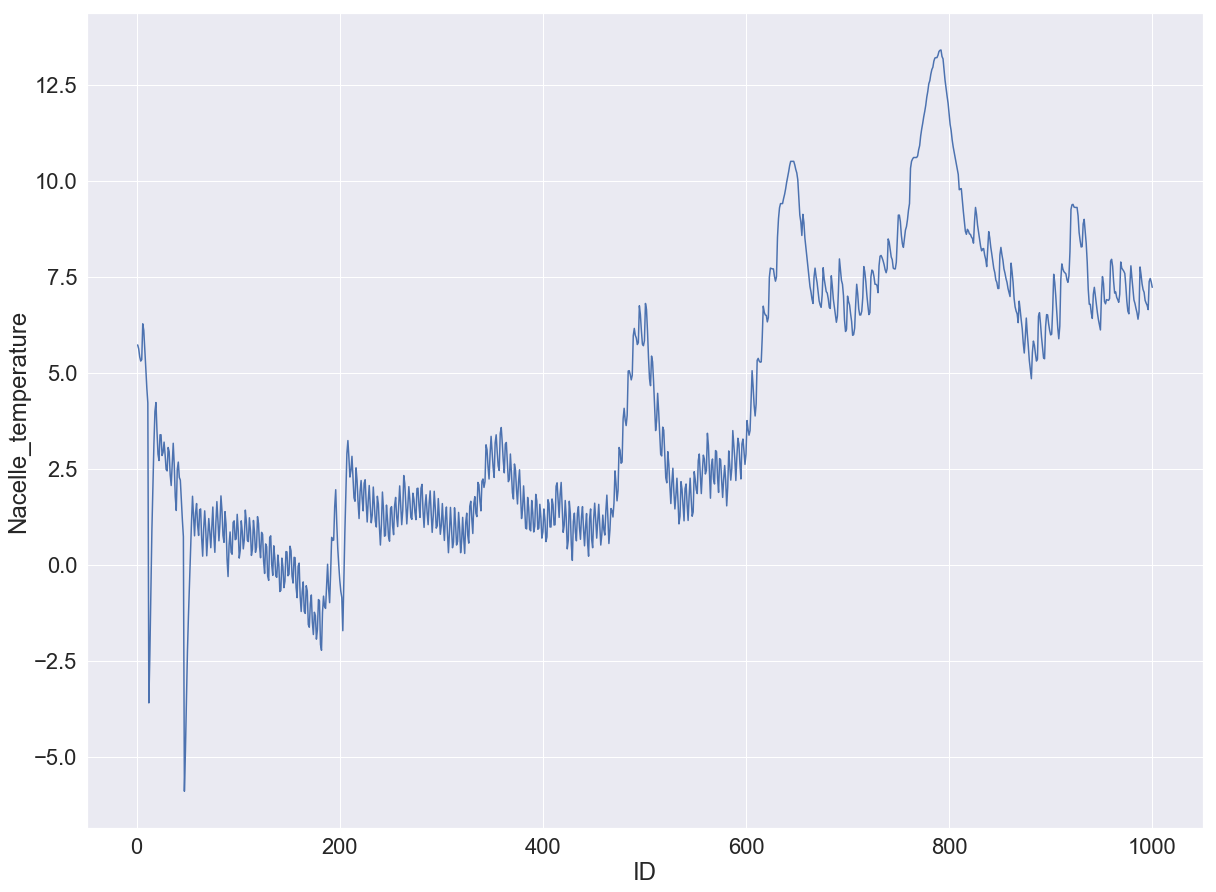

In [142]:
Regression.Plot('ID','Nacelle_temperature', n=1000)

### Data employment

In [238]:
Data = pd.read_csv('data.csv', sep = ',', index_col = 0)

In [5]:
Test_Data = FeatureEngineering(Data[0:10000])

In [6]:
Test_Data.Missing_Values()

Missing Values :

            Total     %
note           63  0.63
diplome        53  0.53
specialite     51  0.51
dispo          50  0.50
cheveux        48  0.48
date           47  0.47
exp            45  0.45
sexe           43  0.43
salaire        43  0.43
age            43  0.43 



In [296]:
Test_Data.Unique()


 date : 
 
 ['2012-06-02' '2011-04-21' '2012-09-07' '2011-07-01' '2012-08-07'
 '2014-02-12' '2013-11-11' '2012-03-10' '2014-10-17' '2011-06-04'
 '2014-08-06' '2010-04-22' '2011-10-23' '2014-06-25' '2011-10-15'
 '2010-07-12' '2012-02-05' '2010-07-03' '2010-07-21' '2014-07-22'
 '2010-02-12' '2014-05-22' '2010-01-04' '2012-03-20' '2012-01-16'
 '2014-05-13' '2013-04-12' '2013-06-18' '2010-01-02' '2010-07-25'
 '2010-03-21' '2014-05-29' '2012-09-03' '2010-06-21' '2011-11-04'
 '2010-08-01' '2013-01-10' '2013-06-14' '2014-11-08' '2013-04-23'
 '2014-09-07' '2012-04-28' '2013-09-29' '2014-12-11' '2014-12-27'
 '2010-02-18' '2014-06-07' '2011-03-18' '2010-08-03' '2011-07-03'
 '2014-01-10' '2010-05-23' '2012-07-18' '2013-03-17' '2010-12-13'
 '2014-11-27' '2014-06-24' '2011-01-01' '2010-04-05' '2010-11-03'
 '2013-06-12' '2014-08-02' '2011-09-03' '2012-06-22' '2012-03-08'
 '2014-05-17' '2011-05-30' '2013-04-20' '2012-01-04' '2013-12-20'
 '2010-10-05' '2011-06-11' '2012-05-09' '2012-02-15' '2014-12-1

In [297]:
Test_Data.To_numeric_freq(columns = 'all').T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,...,90.00,91.00,92.00,93.00,94.00,95.00,96.00,97.00,98.00,99.00
date,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
cheveux,0.09,0.28,0.28,0.32,0.09,0.31,0.32,0.09,0.31,0.31,...,0.32,0.31,0.32,0.28,0.31,0.31,0.32,0.32,0.09,0.28
age,25.00,35.00,29.00,NaN,35.00,37.00,33.00,31.00,43.00,28.00,...,41.00,38.00,45.00,23.00,35.00,25.00,56.00,46.00,19.00,47.00
exp,9.00,13.00,13.00,12.00,6.00,8.00,12.00,10.00,10.00,11.00,...,6.00,11.00,3.00,9.00,3.00,6.00,10.00,10.00,11.00,8.00
salaire,26803.00,38166.00,35207.00,32442.00,28533.00,38558.00,39476.00,42392.00,28625.00,32454.00,...,32184.00,39178.00,36206.00,28975.00,31214.00,31112.00,33522.00,29724.00,29818.00,41011.00
sexe,0.39,0.61,0.61,0.61,0.39,0.61,0.61,0.61,0.61,0.61,...,0.61,0.61,0.39,0.61,0.39,0.61,0.61,0.39,0.61,0.61
diplome,0.36,0.36,0.36,0.36,0.36,0.32,0.32,0.36,0.20,0.32,...,0.20,0.32,0.36,0.32,0.20,0.20,0.20,0.32,0.11,0.11
specialite,0.57,0.20,0.57,0.57,0.16,0.57,0.57,0.20,0.57,0.20,...,0.20,0.57,0.57,0.57,0.20,0.20,0.57,0.57,0.57,0.16
note,97.08,63.86,78.50,45.09,81.91,63.46,50.20,62.20,65.17,66.93,...,91.68,64.62,73.93,73.40,87.67,87.69,106.21,75.23,89.99,51.12


In [300]:
Test_Data.To_numeric_quant(columns = 'all').T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,0.00,1.00,2.0,3.00,4.00,5.00,6.0,7.0,8.00,9.00,...,90.00,91.00,92.00,93.0,94.00,95.00,96.00,97.00,98.00,99.00
date,77.00,14.00,36.0,91.00,2.00,40.00,24.0,15.0,10.00,83.00,...,45.00,87.00,78.00,74.0,25.00,56.00,34.00,72.00,17.00,46.00
cheveux,1.00,2.00,2.0,4.00,1.00,3.00,4.0,1.0,3.00,3.00,...,4.00,3.00,4.00,2.0,3.00,3.00,4.00,4.00,1.00,2.00
age,25.00,35.00,29.0,NaN,35.00,37.00,33.0,31.0,43.00,28.00,...,41.00,38.00,45.00,23.0,35.00,25.00,56.00,46.00,19.00,47.00
exp,9.00,13.00,13.0,12.00,6.00,8.00,12.0,10.0,10.00,11.00,...,6.00,11.00,3.00,9.0,3.00,6.00,10.00,10.00,11.00,8.00
salaire,26803.00,38166.00,35207.0,32442.00,28533.00,38558.00,39476.0,42392.0,28625.00,32454.00,...,32184.00,39178.00,36206.00,28975.0,31214.00,31112.00,33522.00,29724.00,29818.00,41011.00
sexe,1.00,2.00,2.0,2.00,1.00,2.00,2.0,2.0,2.00,2.00,...,2.00,2.00,1.00,2.0,1.00,2.00,2.00,1.00,2.00,2.00
diplome,4.00,4.00,4.0,4.00,4.00,3.00,3.0,4.0,2.00,3.00,...,2.00,3.00,4.00,3.0,2.00,2.00,2.00,3.00,1.00,1.00
specialite,4.00,3.00,4.0,4.00,2.00,4.00,4.0,3.0,4.00,3.00,...,3.00,4.00,4.00,4.0,3.00,3.00,4.00,4.00,4.00,2.00
note,97.08,63.86,78.5,45.09,81.91,63.46,50.2,62.2,65.17,66.93,...,91.68,64.62,73.93,73.4,87.67,87.69,106.21,75.23,89.99,51.12


In [14]:
np.random.normal(0,1)

-0.2002903410704253

In [69]:
def TimeSeries(n):
    
    x = range(0,n,1)
    
    T = []
    
    for i in x:
        
        T.append(.03*x[i]+3 * np.cos(.3*x[i])+np.random.normal(10,1))
    
    return(x,T)

TS_x, result = TimeSeries(500)


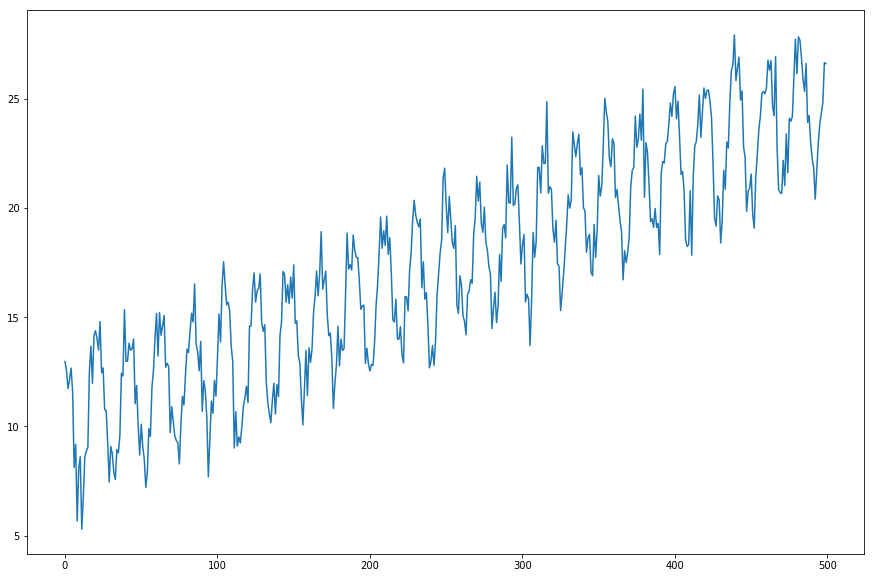

In [54]:
plt.figure(figsize = (15,10))
sns.lineplot(TS_x, result)

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = result
result = seasonal_decompose(series, model='multiplicative', freq = 1)
trend = result.trend
season = result.seasonal
residu = result.resid
#print(result.observed)

In [74]:
sns.lineplot(TS_x, trend)

TypeError: unsupported operand type(s) for -: 'float' and 'DecomposeResult'

In [ ]:
seasonal, trend, and resid attributes.

In [254]:
X

1000.0844538850092

,Distribution,p-value
0,cauchy,0.0000
1,expon,0.0000
2,laplace,0.0000
3,norm,0.0000


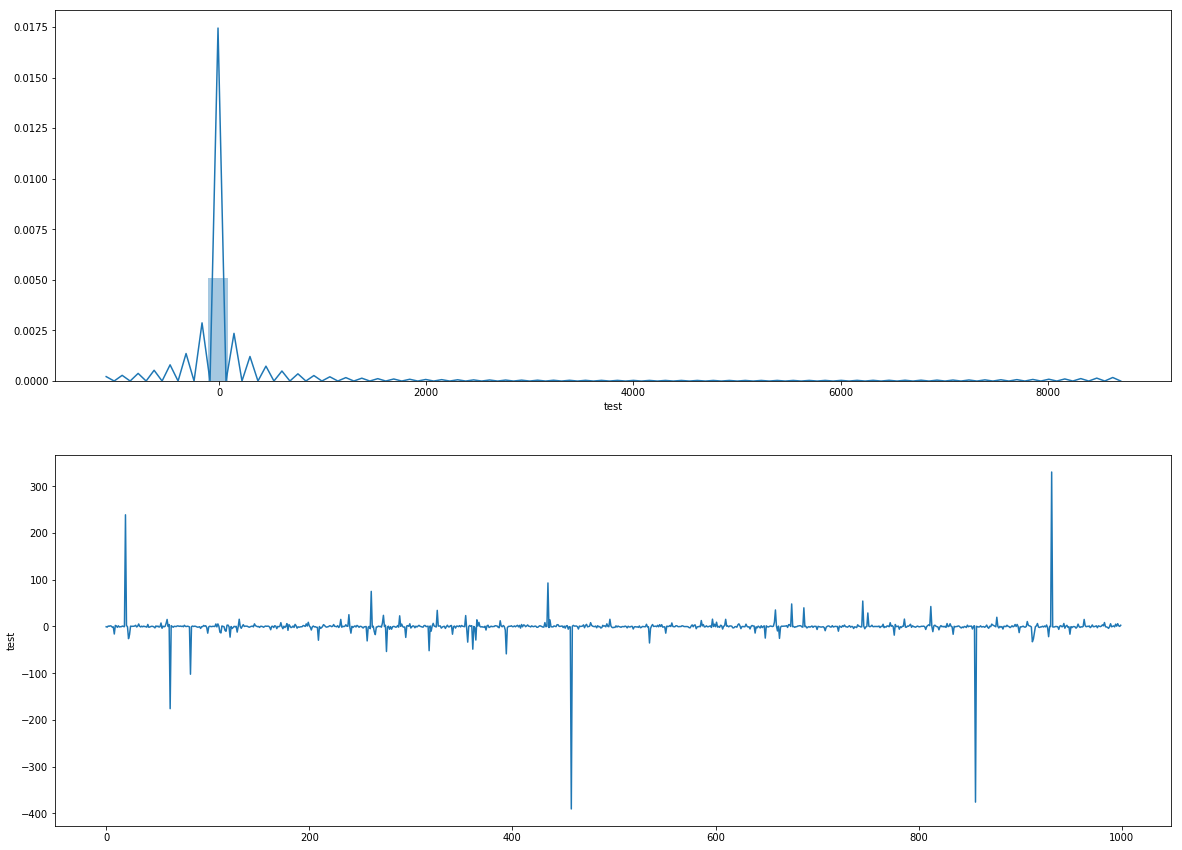

In [263]:
X = np.random.standard_cauchy(10000)
DF = pd.DataFrame()
DF['test'] = X
DF
%run -i FeatureEngineering.py
FeatEng = FeatureEngineering(DF)
FeatEng.feature_dist(feature = 'test', n = 1000)

In [245]:
Data['salaire'].fillna(Data['salaire'].mean(), inplace = True)

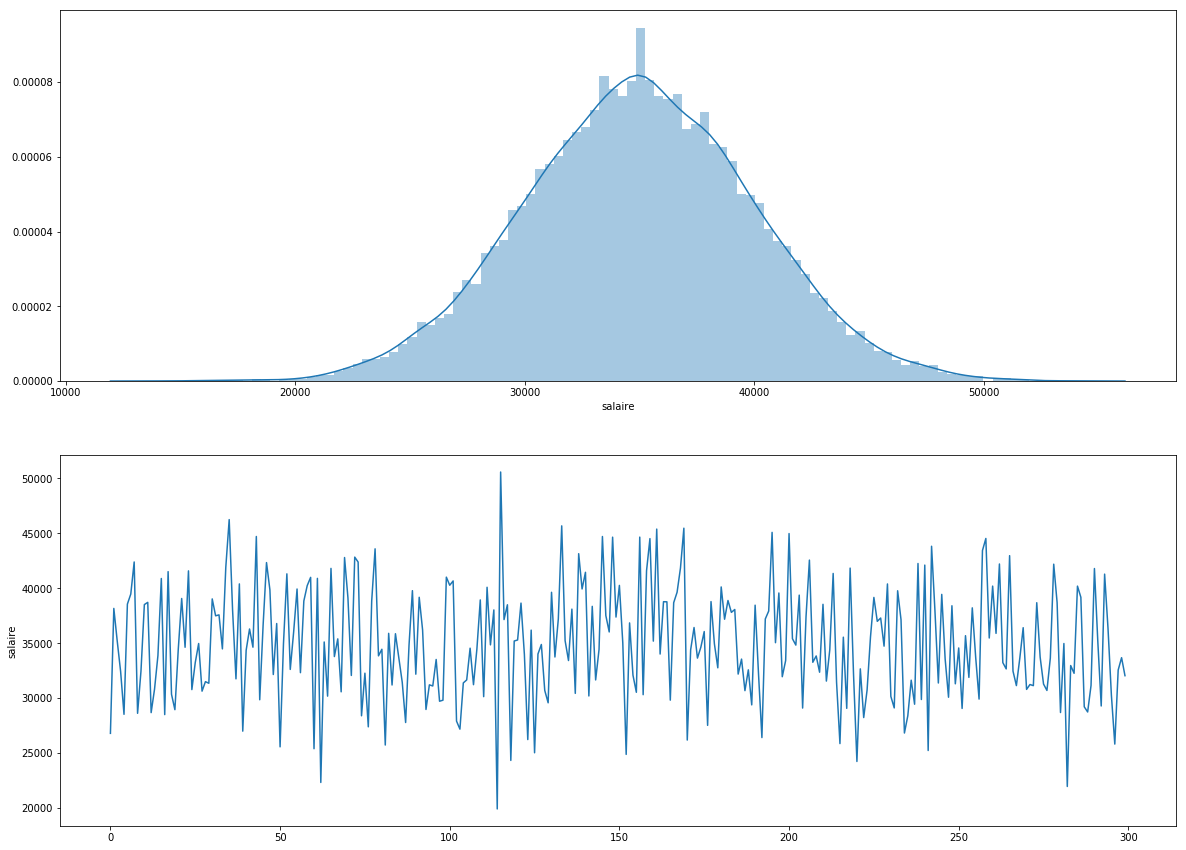

In [267]:
%run -i FeatureEngineering.py
FeatEng = FeatureEngineering(Data)
FeatEng.feature_dist(feature = 'salaire', n = 300)

In [162]:
Data.fillna(0, inplace = True)